In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flowers.zip to flowers.zip


In [ ]:
import zipfile
import os

# ZIP dosyasını çıkar
with zipfile.ZipFile("flowers.zip", 'r') as zip_ref:
    zip_ref.extractall("flowers")

# Çıkarılan klasörleri görelim
os.listdir("flowers")

['rose', 'daisy', 'sunflower', 'dandelion', 'tulip']

In [ ]:
import glob

for category in os.listdir("flowers"):
    img_count = len(glob.glob(f"flowers/{category}/*.jpg"))
    print(f"{category}: {img_count} images")

rose: 784 images
daisy: 764 images
sunflower: 733 images
dandelion: 1052 images
tulip: 984 images


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parametreler
img_size = (150, 150)
batch_size = 32

# Verileri ayır
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "flowers",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "flowers",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.3736 - loss: 1.7535 - val_accuracy: 0.5477 - val_loss: 1.1700
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.6143 - loss: 0.9908 - val_accuracy: 0.6070 - val_loss: 0.9924
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7372 - loss: 0.7227 - val_accuracy: 0.6047 - val_loss: 0.9722
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8367 - loss: 0.4748 - val_accuracy: 0.6151 - val_loss: 1.0938
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8977 - loss: 0.3004 - val_accuracy: 0.6012 - val_loss: 1.2638


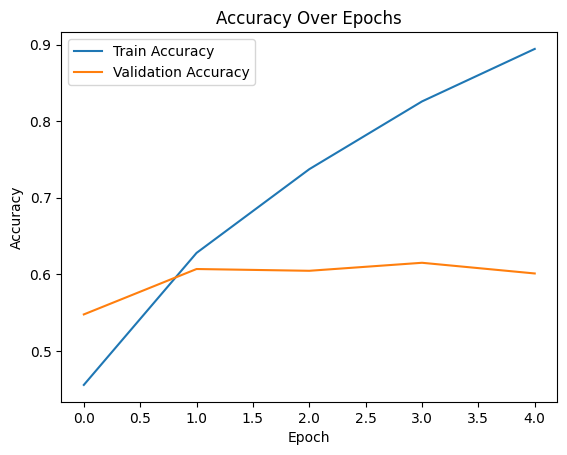

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model.save("flower_model.h5")

In [ ]:
from google.colab import files
files.download("flower_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>